In [2]:
import pandas as pd

df = pd.read_csv("/Users/touka/Desktop/BAU/forth year/s2/AIN3009/project/Mlflow_project/data/Healthcare-Diabetes.csv")  
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [7]:
df.drop(columns=['Id'], inplace=True)

In [8]:
df['Outcome'].value_counts()

Outcome
0    1816
1     952
Name: count, dtype: int64

In [10]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','Age']

for col in zero_cols:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros")

Glucose: 18 zeros
BloodPressure: 125 zeros
SkinThickness: 800 zeros
Insulin: 1330 zeros
BMI: 39 zeros
Age: 0 zeros


In [14]:
import numpy as np
df[zero_cols] = df[zero_cols].replace(0, np.nan)

df.fillna({col: df[col].median() for col in zero_cols}, inplace=True)

In [15]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','Age']

for col in zero_cols:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros")

Glucose: 0 zeros
BloodPressure: 0 zeros
SkinThickness: 0 zeros
Insulin: 0 zeros
BMI: 0 zeros
Age: 0 zeros


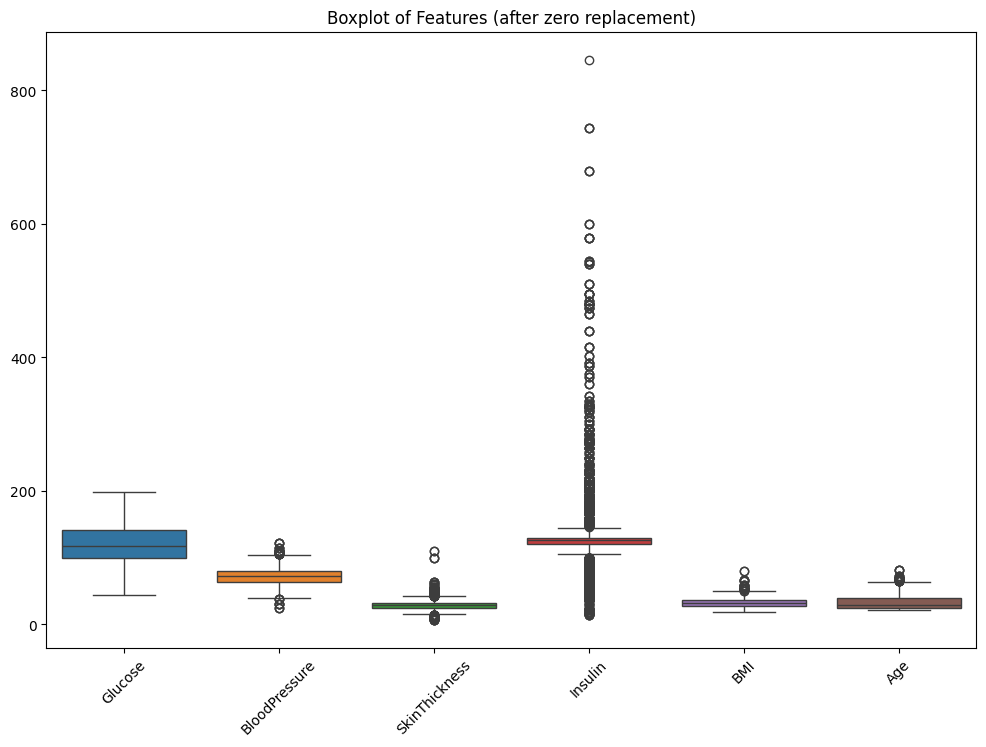

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[zero_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Features (after zero replacement)")
plt.show()


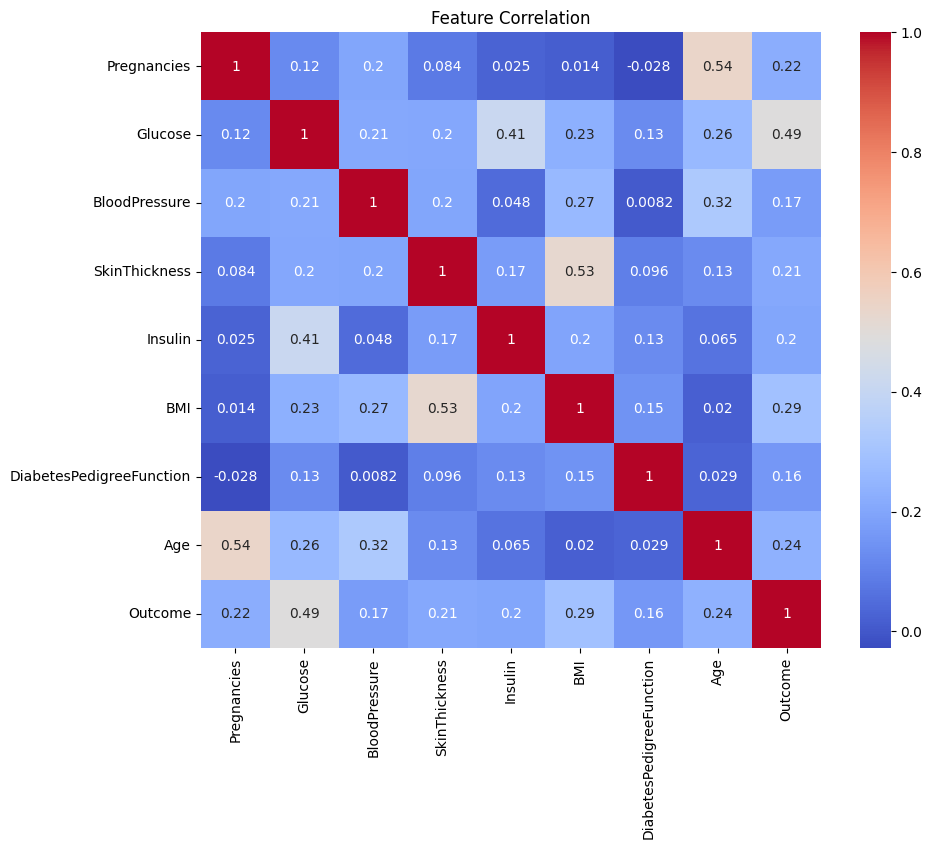

In [17]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [19]:
df.to_csv("/Users/touka/Desktop/BAU/forth year/s2/AIN3009/project/Mlflow_project/data/diabetes_cleaned.csv", index=False)